In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dates = pd.read_csv("dim_date.csv")
hotels = pd.read_csv("dim_hotels.csv")
rooms = pd.read_csv("dim_rooms.csv")
bookings = pd.read_csv("fact_bookings.csv")
aggregated_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [3]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
bookings.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [5]:
bookings.shape

(134590, 12)

In [6]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [7]:
bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [8]:
bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [9]:
bookings.describe(include=object)

,booking_id,booking_date,check_in_date,checkout_date,room_category,booking_platform,booking_status
count,134590,134590,134590,134590,134590,134590,134590
unique,134590,116,92,97,4,7,3
top,Jul312217564RT410,2022-06-08,2022-07-16,2022-05-09,RT2,others,Checked Out
freq,1,1670,2017,1840,49505,55066,94411


In [10]:
bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [11]:
bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [12]:
max(bookings.revenue_generated)

45220

In [13]:
min(bookings.revenue_generated)

6500

In [14]:
max(bookings.no_guests)

6

In [15]:
min(bookings.no_guests)

1

In [16]:
min(bookings.check_in_date)

'2022-05-01'

In [17]:
max(bookings.checkout_date)

'2022-08-06'

In [18]:
bookings.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564])

In [19]:
bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [20]:
bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [21]:
bookings.property_id.value_counts()

property_id
16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: count, dtype: int64

In [22]:
bookings.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [23]:
bookings[bookings["booking_status"]=="No Show"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
7,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2,RT1,logtrip,NaN,No Show,9100,9100
32,May012216558RT215,16558,2022-04-29,2022-05-01,2022-05-04,2,RT2,direct offline,NaN,No Show,12600,12600
67,May012216559RT118,16559,2022-04-27,2022-05-01,2022-05-03,2,RT1,others,NaN,No Show,11050,11050
93,May012216559RT219,16559,2022-04-29,2022-05-01,2022-05-02,3,RT2,others,NaN,No Show,16830,16830
101,May012216559RT227,16559,2022-04-29,2022-05-01,2022-05-03,2,RT2,tripster,NaN,No Show,15300,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
134525,Jul312219563RT37,19563,2022-07-30,2022-07-31,2022-08-01,1,RT3,others,NaN,No Show,18000,18000
134535,Jul312219563RT317,19563,2022-07-31,2022-07-31,2022-08-01,1,RT3,others,NaN,No Show,18000,18000
134548,Jul312217564RT17,17564,2022-07-31,2022-07-31,2022-08-01,1,RT1,direct offline,NaN,No Show,11050,11050
134567,Jul312217564RT218,17564,2022-07-31,2022-07-31,2022-08-02,1,RT2,others,NaN,No Show,15300,15300


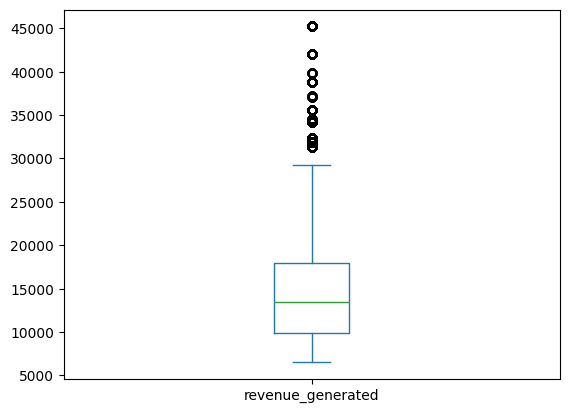

In [24]:
bookings.revenue_generated.plot(kind="box")
plt.show()

In [25]:
higher_rev_genereted_limit = \
bookings.revenue_generated.mean() + bookings.revenue_generated.std()*3
higher_rev_genereted_limit

np.float64(34274.61740350578)

In [26]:
lower_rev_genereted_limit = \
bookings.revenue_generated.mean() - bookings.revenue_generated.std()*3
lower_rev_genereted_limit

np.float64(-4442.591027103368)

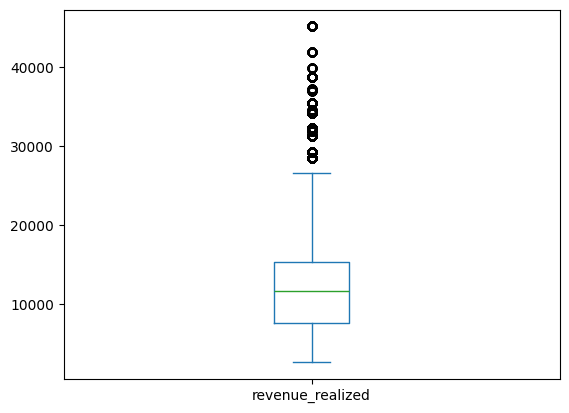

In [27]:
bookings.revenue_realized.plot(kind="box")
plt.show()

In [28]:
higher_rev_realized_limit = \
bookings.revenue_realized.mean() + bookings.revenue_realized.std()*3
higher_rev_realized_limit

np.float64(33480.44762788103)

In [29]:
lower_rev_realized_limit = \
bookings.revenue_realized.mean() - bookings.revenue_realized.std()*3
lower_rev_realized_limit

np.float64(-8088.201116253131)

In [30]:
bookings[bookings.revenue_generated>higher_rev_genereted_limit].room_category.unique()

array(['RT4'], dtype=object)

In [31]:
bookings[bookings.room_category=="RT4"].revenue_generated.describe()

count    16073.000000
mean     27465.751260
std       6310.852167
min      19000.000000
25%      19000.000000
50%      28500.000000
75%      32300.000000
max      45220.000000
Name: revenue_generated, dtype: float64

In [32]:
aggregated_bookings.shape

(9200, 5)

In [33]:
aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [34]:
aggregated_bookings["Occupancy %"] = (
aggregated_bookings["successful_bookings"]/aggregated_bookings["capacity"])
aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %
0,16559,01-May-22,RT1,25,30,0.833333
1,19562,01-May-22,RT1,28,30,0.933333
2,19563,01-May-22,RT1,23,30,0.766667
3,17558,01-May-22,RT1,13,19,0.684211
4,16558,01-May-22,RT1,18,19,0.947368


In [35]:
aggregated_bookings["Occupancy %"]= \
aggregated_bookings["Occupancy %"].apply(lambda x: round(x*100,2))
aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74


In [36]:
aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   int64  
 5   Occupancy %          9200 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 431.4+ KB


In [37]:
aggregated_bookings.describe()

,property_id,successful_bookings,capacity,Occupancy %
count,9200.000000,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000,58.308476
std,1099.818325,7.591770,11.440971,15.268570
min,16558.000000,1.000000,3.000000,21.050000
25%,17558.000000,9.000000,18.000000,47.370000
50%,17564.000000,14.000000,25.000000,56.250000
75%,18563.000000,19.000000,34.000000,66.670000
max,19563.000000,43.000000,50.000000,100.000000


In [38]:
aggregated_bookings.groupby("room_category")["Occupancy %"].mean().round(2)

room_category
RT1    57.92
RT2    58.01
RT3    58.03
RT4    59.28
Name: Occupancy %, dtype: float64

In [39]:
rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [40]:
df = pd.merge(aggregated_bookings, rooms,
              left_on="room_category", right_on="room_id")

In [41]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard


In [42]:
df.groupby("room_class")["Occupancy %"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.92
Name: Occupancy %, dtype: float64

In [43]:
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [44]:
hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [45]:
df2= pd.merge(aggregated_bookings,hotels, on="property_id")

In [46]:
df2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,Atliq Grands,Luxury,Delhi


In [47]:
df2.groupby("city")["Occupancy %"].mean().round(2)

city
Bangalore    56.34
Delhi        61.52
Hyderabad    58.12
Mumbai       57.92
Name: Occupancy %, dtype: float64

In [48]:
dates.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [49]:
dates.day_type.unique()

array(['weekend', 'weekeday'], dtype=object)

In [50]:
df3= pd.merge(aggregated_bookings,dates, left_on="check_in_date", right_on="date")

In [51]:
df3.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,01-May-22,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,01-May-22,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,01-May-22,May 22,W 19,weekend
3,17558,01-May-22,RT1,13,19,68.42,01-May-22,May 22,W 19,weekend
4,16558,01-May-22,RT1,18,19,94.74,01-May-22,May 22,W 19,weekend


In [52]:
df3.groupby("day_type")["Occupancy %"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: Occupancy %, dtype: float64

In [53]:
df3["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [54]:
df4=pd.merge(df3,hotels, on="property_id")
df4.drop("date",axis=1,inplace=True)
df4.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,mmm yy,week no,day_type,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,May 22,W 19,weekend,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,May 22,W 19,weekend,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,May 22,W 19,weekend,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,May 22,W 19,weekend,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi


In [55]:
df_june= df4[df4["mmm yy"]=="Jun 22"]

In [56]:
df_june.groupby("city")["Occupancy %"].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: Occupancy %, dtype: float64

In [57]:
df5= pd.merge(bookings,hotels, on="property_id")

In [58]:
df5.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [59]:
df5.groupby("city")["revenue_generated"].sum().sort_values(ascending=False)

city
Mumbai       784865350
Bangalore    494828175
Hyderabad    381400850
Delhi        346451840
Name: revenue_generated, dtype: int64

In [60]:
df5.groupby("city")["revenue_realized"].sum().sort_values(ascending=False)

city
Mumbai       668640991
Bangalore    420397050
Hyderabad    325232870
Delhi        294500318
Name: revenue_realized, dtype: int64

In [61]:
df6= pd.merge(bookings,dates, left_on= "check_in_date", right_on= "date")

In [62]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [63]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [64]:
dates["date"]= pd.to_datetime(dates["date"]).head()

In [65]:
bookings["check_in_date"]= pd.to_datetime(bookings["check_in_date"]).head()

In [66]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5 non-null      datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [67]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      5 non-null       datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 12.3+ MB


In [68]:
df6= pd.merge(bookings,dates, left_on= "check_in_date", right_on= "date")
df6.drop("date",axis=1,inplace=True)
df6.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend


In [69]:
df6.groupby("mmm yy")["revenue_generated"].sum().sort_values(ascending=True)

mmm yy
May 22    52194995840
Jun 22    60224939550
Jul 22    62232437535
Name: revenue_generated, dtype: int64

In [70]:
df6.groupby("mmm yy")["revenue_realized"].sum().sort_values(ascending=True)

mmm yy
May 22    44427119204
Jun 22    51262017570
Jul 22    52970751489
Name: revenue_realized, dtype: int64